# Obesity Levels Estimation using Supervised Learning

## Introduntion

This project utilizes a comprehensive dataset containing 17 attributes and 2,111 records from individuals in Mexico, Peru, and Colombia to classify obesity levels based on eating habits, physical activity, and demographic information. The dataset includes seven obesity categories: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III. It features key attributes such as age, gender, height, weight, meal frequency, water consumption, dietary habits, physical activity levels, smoking and alcohol consumption, and preferred modes of transportation. Notably, 77% of the data was synthetically generated using the Weka tool and the SMOTE filter, while 23% was collected through a web platform. 




Below is the description of each column:

| Variable Name                  | Role    | Type          | Demographic | Description                                                                             | Units | Missing Values |
|--------------------------------|---------|---------------|-------------|-----------------------------------------------------------------------------------------|-------|----------------|
| Gender                         | Feature | Categorical   | Gender      |                                                                                         |       | no             |
| Age                            | Feature | Continuous    | Age         |                                                                                         |       | no             |
| Height                         | Feature | Continuous    |             |                                                                                         |       | no             |
| Weight                         | Feature | Continuous    |             |                                                                                         |       | no             |
| family_history_with_overweight | Feature | Binary        |             | Has a family member suffered or suffers from overweight?                                |       | no             |
| FAVC                           | Feature | Binary        |             | Do you eat high caloric food frequently?                                                |       | no             |
| FCVC                           | Feature | Integer       |             | Do you usually eat vegetables in your meals?                                            |       | no             |
| NCP                            | Feature | Continuous    |             | How many main meals do you have daily?                                                  |       | no             |
| CAEC                           | Feature | Categorical   |             | Do you eat any food between meals?                                                      |       | no             |
| SMOKE                          | Feature | Binary        |             | Do you smoke?                                                                           |       | no             |
| CH2O                           | Feature | Continuous    |             | How much water do you drink daily?                                                      |       | no             |
| SCC                            | Feature | Binary        |             | Do you monitor the calories you eat daily?                                              |       | no             |
| FAF                            | Feature | Continuous    |             | How often do you have physical activity?                                                |       | no             |
| TUE                            | Feature | Integer       |             | How much time do you use technological devices such as cell phone, videogames, etc.?    |       | no             |
| CALC                           | Feature | Categorical   |             | How often do you drink alcohol?                                                         |       | no             |
| MTRANS                         | Feature | Categorical   |             | Which transportation do you usually use?                                                |       | no             |
| NObeyesdad                     | Target  | Categorical   |             | Obesity level                                                                           |       | no             |


In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [213]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 
  
# metadata 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata) 

{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

In [214]:
print(X.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Walking  
4  Public_Transportation  


In [215]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [216]:
print(y.head())

            NObeyesdad
0        Normal_Weight
1        Normal_Weight
2        Normal_Weight
3   Overweight_Level_I
4  Overweight_Level_II


## Data cleaning

Many features represented as strings are actually binary, we need to convert them back to the correct data type.

In [217]:
# Print the unique values of the column "Gender"
print(X["Gender"].unique())

['Female' 'Male']


As we can see, the "Gender" column is binary.

In [218]:
# Convert the "Gender" feature to numeric
X["Gender"] = X["Gender"].map({"Male": "1", "Female": "0"}).astype("float")

C:\Users\hddhx\AppData\Local\Temp\ipykernel_13372\751144097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].map({"Male": "1", "Female": "0"}).astype("float")


In [219]:
print(X["Gender"].unique())

[0. 1.]


Next we will explore the unique values of other categorical columns.

In [220]:
cat_cols = X.select_dtypes(include=["object"]).columns
for column in cat_cols:
    print(f"The unique values of the column {column} are:")
    print(X[column].unique(), "\n"*3)

The unique values of the column family_history_with_overweight are:
['yes' 'no'] 



The unique values of the column FAVC are:
['no' 'yes'] 



The unique values of the column CAEC are:
['Sometimes' 'Frequently' 'Always' 'no'] 



The unique values of the column SMOKE are:
['no' 'yes'] 



The unique values of the column SCC are:
['no' 'yes'] 



The unique values of the column CALC are:
['no' 'Sometimes' 'Frequently' 'Always'] 



The unique values of the column MTRANS are:
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike'] 





Other binary features, such as 'FAVC', contain the unique values 'yes' and 'no'. We aim to convert these values to 'True' and 'False' and represent them as boolean variables.

In [221]:
binary_col = ["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]
for column in binary_col:
    X[column] = X[column].map({"yes": True, "no": False})

C:\Users\hddhx\AppData\Local\Temp\ipykernel_13372\2024700036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].map({"yes": True, "no": False})
C:\Users\hddhx\AppData\Local\Temp\ipykernel_13372\2024700036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].map({"yes": True, "no": False})
C:\Users\hddhx\AppData\Local\Temp\ipykernel_13372\2024700036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [222]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   float64
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   bool   
 5   FAVC                            2111 non-null   bool   
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   bool   
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   bool   
 12  FAF                             21

## Exploratory Data Analysis (EDA)

### EDA for the distribution of the target

Text(0.0, 1.0, 'Class distribution of the target variable')

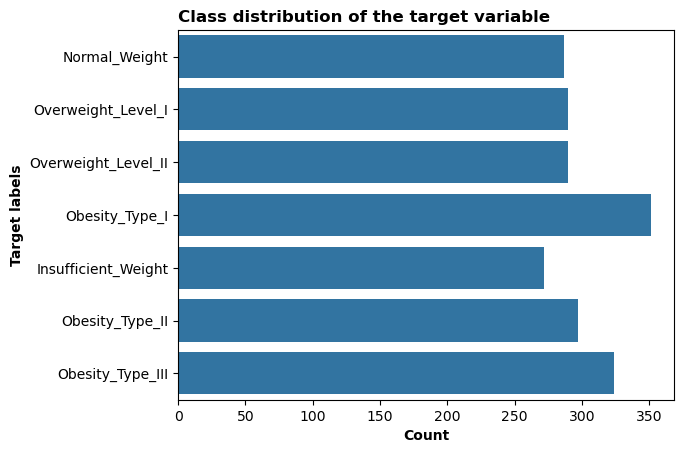

In [223]:
sns.countplot(data = y, y='NObeyesdad')
plt.ylabel("Target labels", weight="bold")
plt.xlabel("Count", weight="bold")
plt.title("Class distribution of the target variable", weight="bold", loc="left")

It seems that the target variable has a fairly even distribution.

## Preprocessing Data For Machine Learning

In this section, we will:
1. Apply one-hot encoding to categorical features.
2. Apply ordinal encoding to the target feature.
3. Split the data into training and testing set.
4. Apply standard scaling to numeric features.


In [224]:
# 1. Apply one-hot encoding to categorical features.
X = pd.get_dummies(X)

In [225]:
print(y['NObeyesdad'].unique())

['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [226]:
# 2. Apply ordinal encoding to the target feature.
ord_enc = OrdinalEncoder(categories=[['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II'
,'Obesity_Type_I', 'Obesity_Type_II','Obesity_Type_III']])
y['NObeyesdad'] = ord_enc.fit_transform(y[['NObeyesdad']])

C:\Users\hddhx\AppData\Local\Temp\ipykernel_13372\860872507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['NObeyesdad'] = ord_enc.fit_transform(y[['NObeyesdad']])


In [227]:
# 3. Split the data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('The shape of the training features: ', X_train.shape)
print('The shape of the training target: ', y_train.shape)
print('The shape of the testing features: ', X_test.shape)
print('The shape of the training target: ', y_test.shape)

The shape of the training features:  (1688, 26)
The shape of the training target:  (1688, 1)
The shape of the testing features:  (423, 26)
The shape of the training target:  (423, 1)


In [228]:
# 4. Apply standard scaling to numeric features.
num_cols = X_train.select_dtypes(exclude=["object", "bool"]).columns[1:]
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Modeling

## K-Nearest Neighbors

In this section, we will experiment with the K-Nearest Neighbors algorithm, starting with K=1

In [229]:
one_nn = KNeighborsClassifier(n_neighbors = 1)
one_nn.fit(X_train, y_train)

c:\Users\hddhx\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [230]:
y_pred_train = one_nn.predict(X_train)
y_pred_test = one_nn.predict(X_test)
print(f"Accuracy score testing data: {accuracy_score(y_test, y_pred_test):.2f}")
print(f"Accuracy score training data: {accuracy_score(y_train, y_pred_train):.2f}")

Accuracy score testing data: 0.85
Accuracy score training data: 1.00


With the number of K being 1, the model is overfitting. We would like to tune the hyperparameter K to optimise model performance.

In [231]:
param_grid = {
    'n_neighbors': np.arange(1, 21).tolist(),
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='accuracy',  # Metric to optimize
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,         # Use all CPUs
    return_train_score=True  # Ensures train scores are available
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters and performance
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters: {'n_neighbors': 1}
Best cross-validation accuracy: 0.863152072761751


c:\Users\hddhx\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Since K=1 is the highest performing model we could achieve, we decided to experiment with other algorithms.

## Decision Tree 

We will start by initialising a decision tree model with no regularisation, we expect the model to be overfitting.

In [232]:
dc_clf = DecisionTreeClassifier(random_state=42)
dc_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [233]:
y_pred_train = dc_clf.predict(X_train)
y_pred_test = dc_clf.predict(X_test)
print(f"Accuracy score testing data: {accuracy_score(y_test, y_pred_test):.2f}")
print(f"Accuracy score training data: {accuracy_score(y_train, y_pred_train):.2f}")

Accuracy score testing data: 0.94
Accuracy score training data: 1.00


We will now tune the hyperparameter "max_depth" of the model.

In [234]:
param_max_depth = {'max_depth': np.arange(1, 15, 1).tolist()}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_max_depth,
    scoring='accuracy',       # Metric to optimize (e.g., 'accuracy', 'f1')
    cv=5,                   # Number of cross-validation folds             
    n_jobs=-1               # Number of parallel jobs (-1 uses all CPUs)
)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

Best parameters: {'max_depth': 14}
Best cross-validation accuracy: 0.93


The highest perfoming decisionn tree model has the maximum depth of 14.

In [235]:
# Extract the best model from gridsearch
best_tree = grid_search.best_estimator_
print(best_tree)

DecisionTreeClassifier(max_depth=14, random_state=42)


In [236]:
# Model evaluation
y_pred_train = best_tree.predict(X_train)
y_pred_test = best_tree.predict(X_test)
print(f"Accuracy score testing data: {accuracy_score(y_test, y_pred_test):.2f}")
print(f"Accuracy score training data: {accuracy_score(y_train, y_pred_train):.2f}")

Accuracy score testing data: 0.94
Accuracy score training data: 1.00


Finally, we will build a neural network to capture the complexity of the dataset.

## Neural Networks

In [237]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [244]:
model = models.Sequential([
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dense(units = 4, activation = 'relu'),
    layers.Dense(units = 7, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [245]:
model.fit(
    X_train, y_train,
    epochs=100
)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9200
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7035
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4801
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2566
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0742
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9229
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8016
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6908
Epoch 9/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5987
Epoch 10/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5316
Epoch 11/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4750
Epoch 12/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4013
Epoch 13/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3963
Epoch 14/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3104
Epoch 15/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2888
Epoc

In [246]:
# Outputting probability
y_pred_train_prob = model.predict(X_train)
y_pred_test_prob = model.predict(X_test)
print("The probability output of the training dataset:")
print(y_pred_train_prob[:5], "\n"*2)
print("The probability output of the testing dataset:")
print(y_pred_test_prob[:5])

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
The probability output of the training dataset:
[[1.10452035e-07 9.99999881e-01 9.44617495e-10 6.26591357e-12
  1.02986018e-22 0.00000000e+00 5.91266484e-36]
 [7.84939714e-03 7.60818273e-03 7.72719551e-03 8.23729206e-03
  7.95421842e-03 1.30596161e-02 9.47564244e-01]
 [9.51175987e-14 1.57046944e-20 8.75631745e-09 6.83360384e-04
  9.99316692e-01 3.27084540e-11 1.10651647e-26]
 [9.99989271e-01 1.07649712e-05 9.79495059e-26 7.76739963e-22
  5.65811210e-30 0.00000000e+00 0.00000000e+00]
 [7.10148992e-15 1.02540233e-24 7.22131285e-13 3.07245409e-06
  9.99996424e-01 4.65175845e-07 2.82397788e-24]] 


The probability output of the testing dataset:
[[9.9999952e-01 4.4636155e-07 5.1415855e-33 5.2122583e-28 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [7.8493971e-03 7.6081827e-03 7.7271955e-03 8.2372921e-03 7.9542184e-03
  1.3059616e-02 9.4756424e-01]
 [9.9999702e-01 2.9718976e-06 1.4792556e-35 1.3042322e-30 0.000000

In [247]:
# Getting labels
y_pred_train = np.argmax(y_pred_train_prob, axis = 1)
print("The predicted label for the training set:", y_pred_train[:5])
y_pred_test = np.argmax(y_pred_test_prob, axis = 1)
print("The predicted label for the testing set:", y_pred_test[:5])

The predicted label for the training set: [1 6 4 0 4]
The predicted label for the testing set: [0 6 0 0 1]


In [248]:
# Evaluate the model
print(f"Accuracy score testing data: {accuracy_score(y_test, y_pred_test):.2f}")
print(f"Accuracy score training data: {accuracy_score(y_train, y_pred_train):.2f}")

Accuracy score testing data: 0.97
Accuracy score training data: 1.00


# Conclusion

The neural network achieved the best performance on the test set, and we will deploy it to the website.

# Reference

Estimation of Obesity Levels Based On Eating Habits and Physical Condition  [Dataset]. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.